# **BOOTCAMP @ GIKI (Content designed by Usama Arshad) WEEK 2**

**Lab sessions you will conduct:**

---



*   Lab 6: Implementing SVM, Decision Trees, and Evaluation Metrics (Day 6)
* **Lab 7: Implementing Unsupervised Learning Algorithms (Day 7)**
* Lab 8: Feature Engineering and Model Selection Techniques (Day 8)
* Lab 9: Implementing Regression Models (Day 9)
* Lab 10: Implementing Classification Models (Day 10)

**Lab 7: Implementing Unsupervised Learning Algorithms**

---



**K-Means Clustering**

---




---

### K-Means Clustering: Theory and Concept

**What is K-Means Clustering?**

K-Means Clustering is a popular unsupervised learning algorithm used to group data points into clusters. Each cluster contains data points that are more similar to each other than to those in other clusters. The algorithm works by trying to find K cluster centers (called centroids) that best represent the data.

**How does K-Means Clustering work?**

1. **Initialization**:
   - Choose K initial centroids randomly. These centroids are the starting points for each cluster.

2. **Assignment**:
   - Assign each data point to the nearest centroid. This forms K clusters based on the proximity of data points to the centroids.

3. **Update**:
   - Calculate the new centroids by averaging the data points assigned to each cluster. This step involves finding the mean position of all points in a cluster and updating the centroid to this mean.

4. **Repeat**:
   - Repeat the assignment and update steps until the centroids no longer change significantly or a specified number of iterations is reached.

**Goal of K-Means Clustering**:
The main objective is to minimize the total distance between data points and their corresponding centroids. This is achieved by iteratively refining the positions of the centroids to reduce within-cluster variance (the sum of squared distances between points and their centroids).

**Advantages**:
- Simple and easy to understand.
- Efficient for large datasets.
- Works well with spherical cluster shapes.

**Limitations**:
- Requires the number of clusters (K) to be specified in advance.
- Sensitive to initial centroid positions.
- May converge to a local minimum, depending on the initial centroids.

---



<img src="https://miro.medium.com/v2/resize:fit:1400/1*2QXKRG1bGLeyJVeKh9bMsA.gif" alt="Alt Text">


Enter number of clusters for K-Means (default: 3): 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



### Scatter Plot of Data Points with Cluster Assignments ###



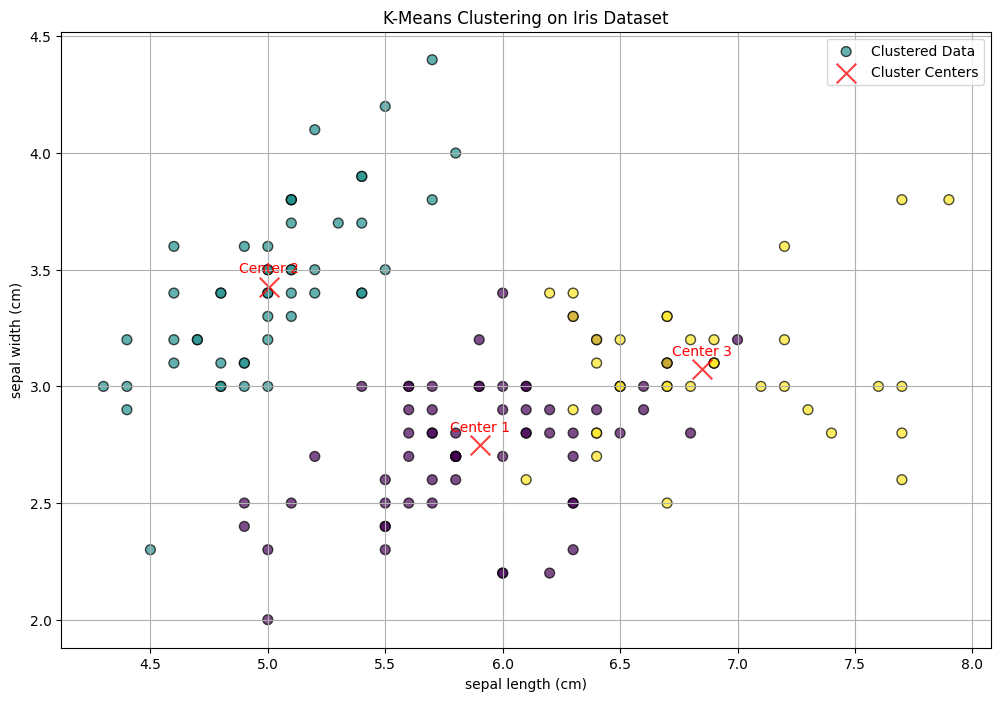

In the scatter plot above, each data point is colored according to the cluster it has been assigned to by the K-Means algorithm. The red 'x' marks indicate the centroids of each cluster.

### Pair Plot of Iris Dataset with Cluster Assignments ###



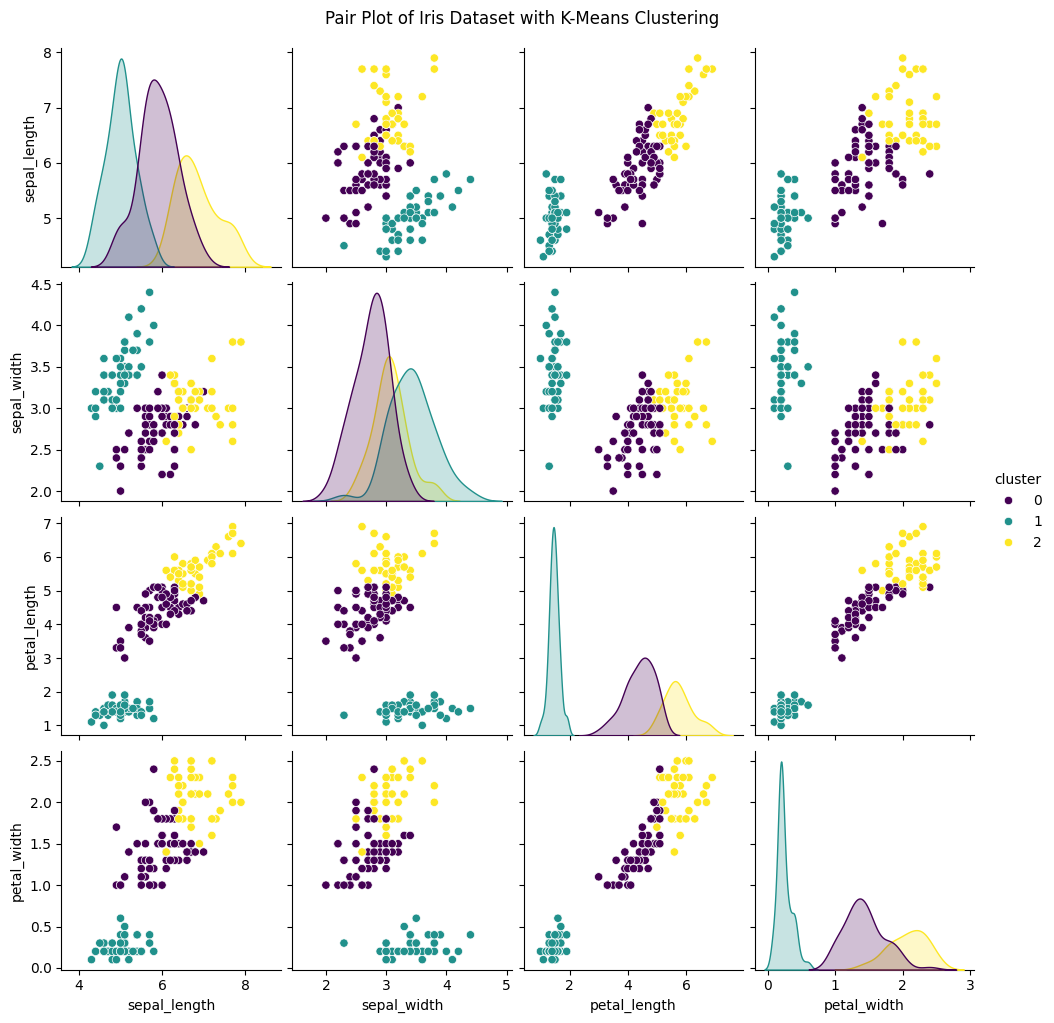

The pair plot shows pairwise relationships between features in the Iris dataset, with points colored by their cluster assignments.

### Heatmap of Cluster Centers ###



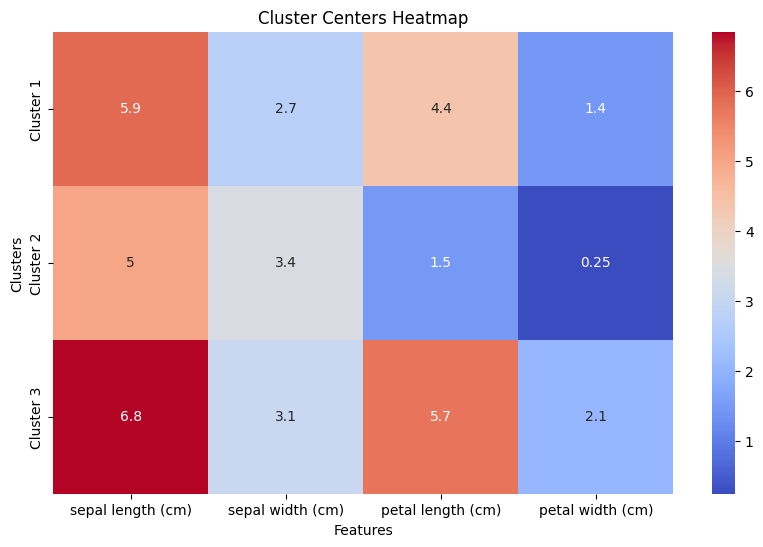

The heatmap displays the values of each feature for the cluster centers. Each row represents a cluster center, and each column represents a feature.

### 3D Scatter Plot of Data Points with Cluster Assignments ###



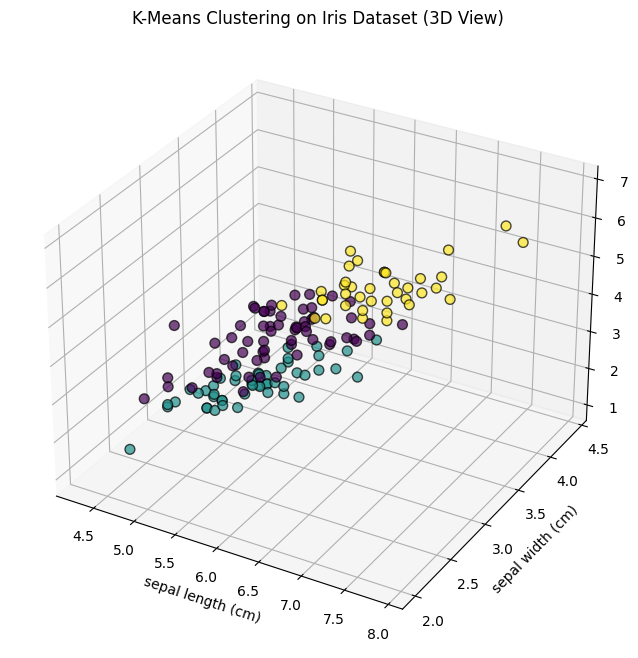

The 3D scatter plot provides a three-dimensional view of the clustering results, showing the distribution of data points and their cluster assignments.


In [4]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
from sklearn.cluster import KMeans  # Importing KMeans from sklearn for clustering
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn

# Function to get user input
def get_user_input(prompt, dtype, default):
    """
    Function to get user input with error handling.
    Parameters:
        prompt (str): The prompt to display to the user.
        dtype (type): The expected data type of the input.
        default: The default value to use if input is invalid or not provided.
    Returns:
        value: The user input converted to the specified data type or the default value.
    """
    try:
        return dtype(input(prompt + f" (default: {default}): ") or default)  # Attempt to get and convert user input
    except ValueError:
        print(f"Invalid input, using default value: {default}")  # Handle invalid input
        return default  # Return default value in case of invalid input

# Main function for K-Means Clustering
def kmeans_clustering():
    """
    Main function to perform K-Means clustering and visualize the results.
    """
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data  # Feature data
    y_true = iris.target  # True labels (for comparison)
    feature_names = iris.feature_names  # Feature names

    # User input for number of clusters
    n_clusters = get_user_input("Enter number of clusters for K-Means", int, 3)  # Get number of clusters from user

    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize KMeans with user-defined clusters
    y_kmeans = kmeans.fit_predict(X)  # Fit KMeans and predict cluster labels

    # Scatter plot of the data points with their cluster assignments
    print("\n### Scatter Plot of Data Points with Cluster Assignments ###\n")
    plt.figure(figsize=(12, 8))  # Create a new figure for plotting
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', marker='o', edgecolor='k', alpha=0.7, label='Clustered Data')  # Plot data points with cluster colors

    # Scatter plot of the cluster centers
    centers = kmeans.cluster_centers_  # Get the coordinates of cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x', label='Cluster Centers')  # Plot cluster centers

    plt.title("K-Means Clustering on Iris Dataset")  # Set the title of the plot
    plt.xlabel(feature_names[0])  # Set the label for the x-axis
    plt.ylabel(feature_names[1])  # Set the label for the y-axis
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid on the plot

    # Adding annotations for cluster centers
    for i, center in enumerate(centers):  # Iterate over each cluster center
        plt.annotate(f'Center {i+1}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')  # Annotate each center

    plt.show()  # Display the plot

    print("In the scatter plot above, each data point is colored according to the cluster it has been assigned to by the K-Means algorithm. The red 'x' marks indicate the centroids of each cluster.")

    # Pair plot with cluster assignments
    print("\n### Pair Plot of Iris Dataset with Cluster Assignments ###\n")
    df = sns.load_dataset('iris')  # Load Iris dataset as a DataFrame
    df['cluster'] = y_kmeans  # Add cluster assignments to DataFrame
    sns.pairplot(df, hue='cluster', palette='viridis')  # Create pair plot with clusters
    plt.suptitle("Pair Plot of Iris Dataset with K-Means Clustering", y=1.02)  # Set title
    plt.show()  # Display the pair plot

    print("The pair plot shows pairwise relationships between features in the Iris dataset, with points colored by their cluster assignments.")

    # Heatmap of cluster centers
    print("\n### Heatmap of Cluster Centers ###\n")
    plt.figure(figsize=(10, 6))  # Create a new figure for the heatmap
    sns.heatmap(kmeans.cluster_centers_, annot=True, cmap='coolwarm', cbar=True, xticklabels=feature_names, yticklabels=[f'Cluster {i+1}' for i in range(n_clusters)])  # Plot heatmap of cluster centers
    plt.title("Cluster Centers Heatmap")  # Set the title of the heatmap
    plt.xlabel("Features")  # Set the label for the x-axis
    plt.ylabel("Clusters")  # Set the label for the y-axis
    plt.show()  # Display the heatmap

    print("The heatmap displays the values of each feature for the cluster centers. Each row represents a cluster center, and each column represents a feature.")

    # 3D Scatter plot with cluster assignments
    print("\n### 3D Scatter Plot of Data Points with Cluster Assignments ###\n")
    from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting toolkit
    fig = plt.figure(figsize=(12, 8))  # Create a new figure for 3D plotting
    ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans, s=50, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)  # Plot data points in 3D space
    ax.set_title("K-Means Clustering on Iris Dataset (3D View)")  # Set the title of the plot
    ax.set_xlabel(feature_names[0])  # Set the label for the x-axis
    ax.set_ylabel(feature_names[1])  # Set the label for the y-axis
    ax.set_zlabel(feature_names[2])  # Set the label for the z-axis
    plt.show()  # Display the 3D plot

    print("The 3D scatter plot provides a three-dimensional view of the clustering results, showing the distribution of data points and their cluster assignments.")

# Run the K-Means clustering function
kmeans_clustering()  # Execute the main function


### Hierarchical Clustering: Theory and Concept

**What is Hierarchical Clustering?**

Hierarchical Clustering is a type of unsupervised learning algorithm used to build a hierarchy of clusters. It is often represented as a tree structure (called a dendrogram), where each leaf represents a data point and branches represent the clusters formed. Hierarchical clustering can be divided into two main types: Agglomerative (bottom-up approach) and Divisive (top-down approach).

**Types of Hierarchical Clustering:**

1. **Agglomerative Hierarchical Clustering**:
   - This is the most common type and works in a bottom-up manner.
   - It starts with each data point as a single cluster and then iteratively merges the closest pairs of clusters until only one cluster remains or a stopping criterion is met.

2. **Divisive Hierarchical Clustering**:
   - This method works in a top-down manner.
   - It starts with all data points in one cluster and then recursively splits the clusters into smaller clusters until each data point is in its own cluster or a stopping criterion is met.

**How does Agglomerative Hierarchical Clustering work?**

1. **Initialization**:
   - Start with each data point as a single cluster.

2. **Compute Proximity Matrix**:
   - Calculate the distance between each pair of clusters to form a proximity matrix.

3. **Merge Clusters**:
   - Find the two closest clusters and merge them into a single cluster.

4. **Update Proximity Matrix**:
   - Update the proximity matrix to reflect the distances between the new cluster and the remaining clusters.

5. **Repeat**:
   - Repeat the merge and update steps until only one cluster remains or a desired number of clusters is achieved.

**Linkage Criteria**:
- **Single Linkage**: The distance between the closest points of the clusters.
- **Complete Linkage**: The distance between the farthest points of the clusters.
- **Average Linkage**: The average distance between all points of the clusters.
- **Ward's Linkage**: Minimizes the increase in total within-cluster variance.

**Advantages**:
- Does not require the number of clusters to be specified in advance.
- Produces a dendrogram, which provides a visual representation of the data's clustering structure.
- Useful for small datasets with meaningful hierarchical relationships.

**Limitations**:
- Computationally expensive for large datasets (especially with complex linkage criteria).
- Once a merge or split is made, it cannot be undone (greedy algorithm).
- Sensitive to noise and outliers.

---



<img src="https://dashee87.github.io/images/hierarch.gif" alt="Alt Text">


Enter number of clusters for Hierarchical Clustering (default: 3): 3

### Scatter Plot of Data Points with Cluster Assignments (Hierarchical Clustering) ###



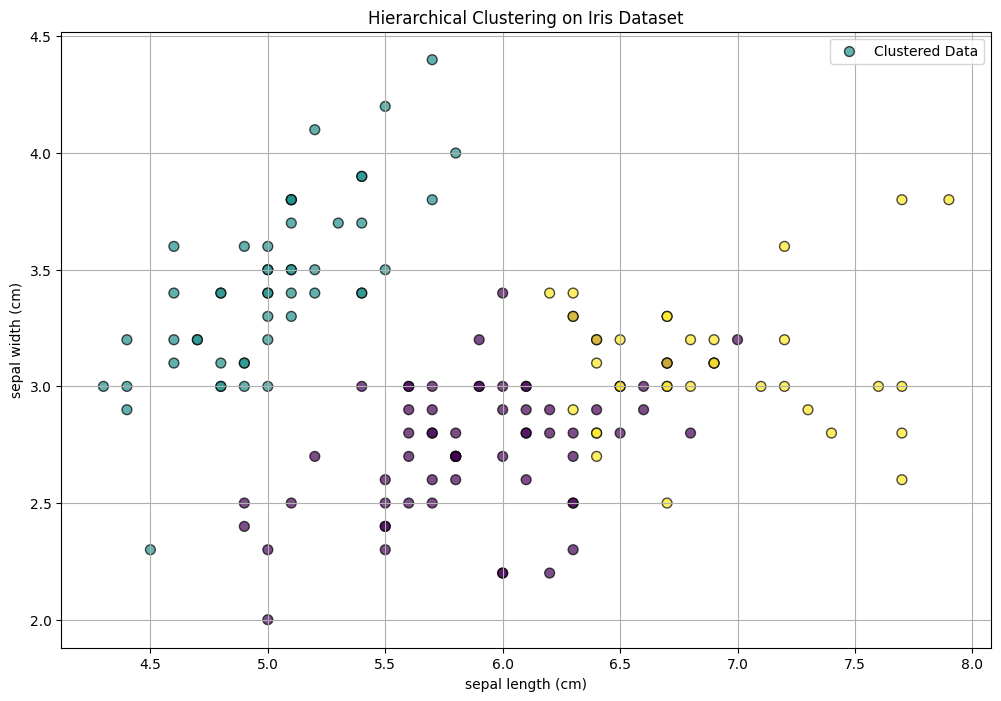

In the scatter plot above, each data point is colored according to the cluster it has been assigned to by the Hierarchical Clustering algorithm.

### Dendrogram ###



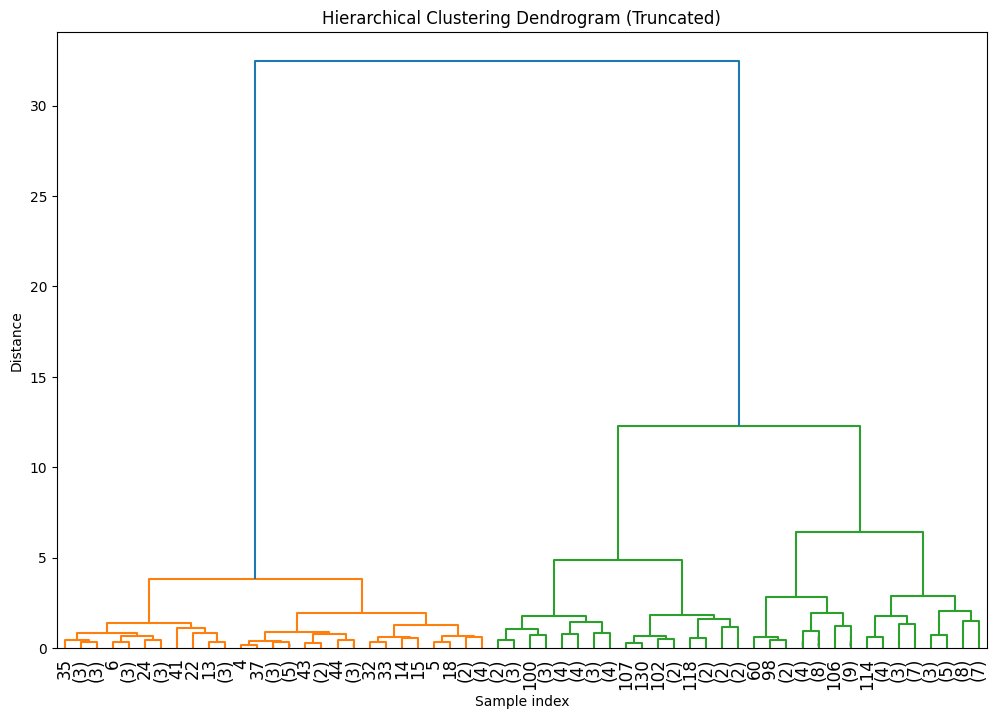

The dendrogram shows the hierarchical relationships between the data points. The vertical lines represent merging of clusters, and the height of each line represents the distance or dissimilarity between clusters.

### Pair Plot of Iris Dataset with Cluster Assignments (Hierarchical Clustering) ###



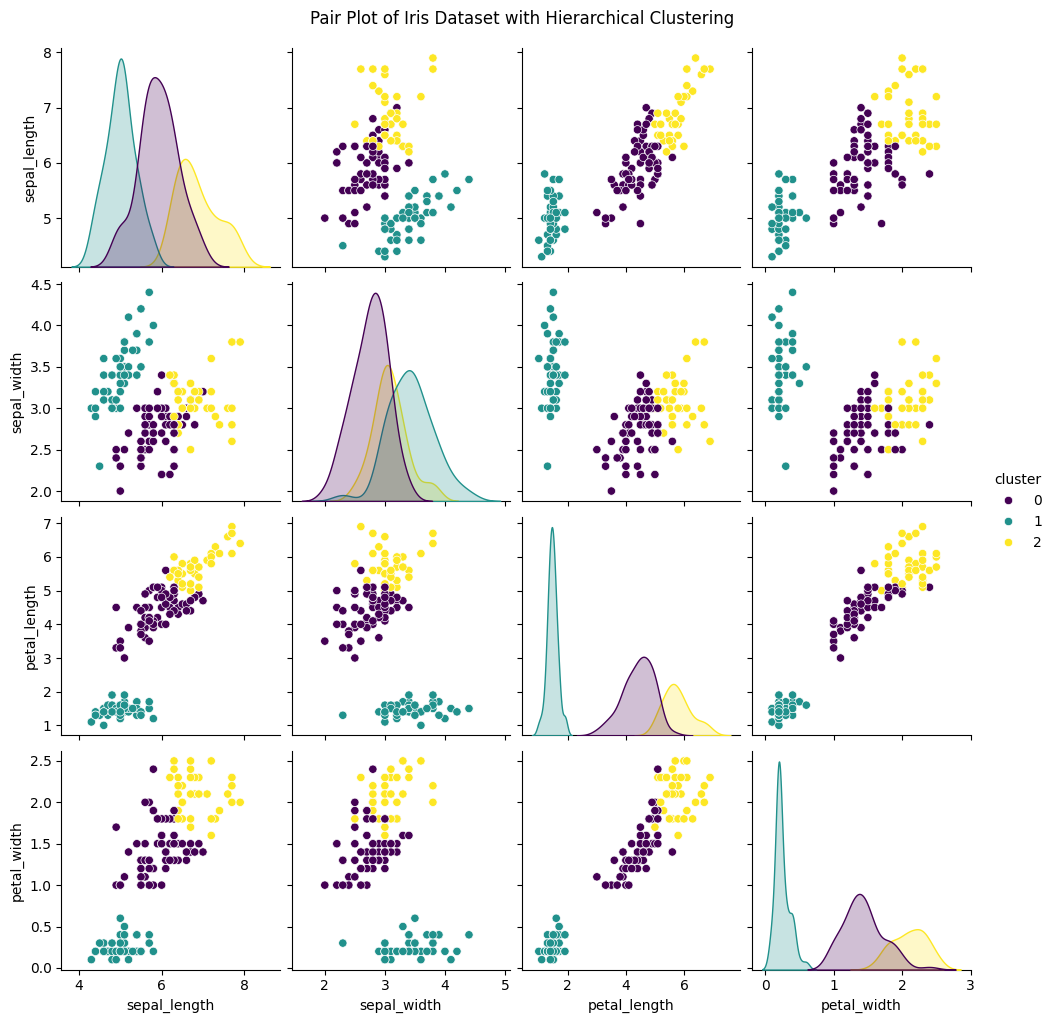

The pair plot shows pairwise relationships between features in the Iris dataset, with points colored by their cluster assignments from the Hierarchical Clustering algorithm.

### Heatmap of Cluster Centers ###



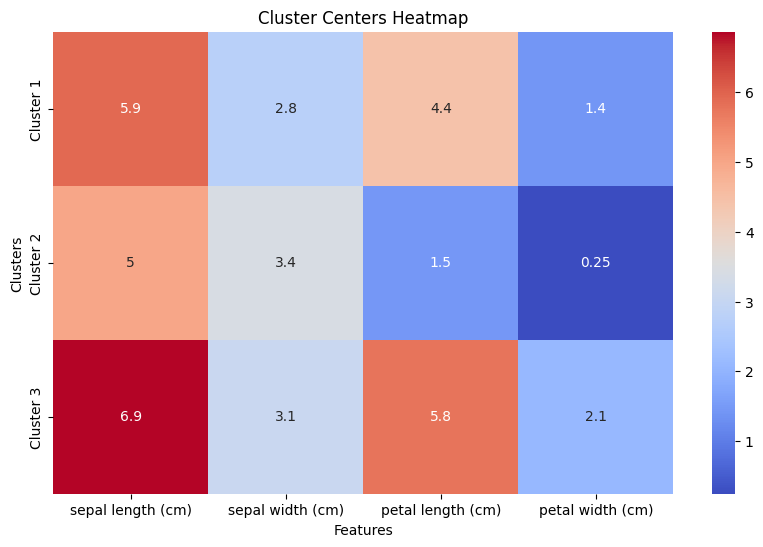

The heatmap displays the values of each feature for the cluster centers. Each row represents a cluster center, and each column represents a feature.

### 3D Scatter Plot of Data Points with Cluster Assignments (Hierarchical Clustering) ###



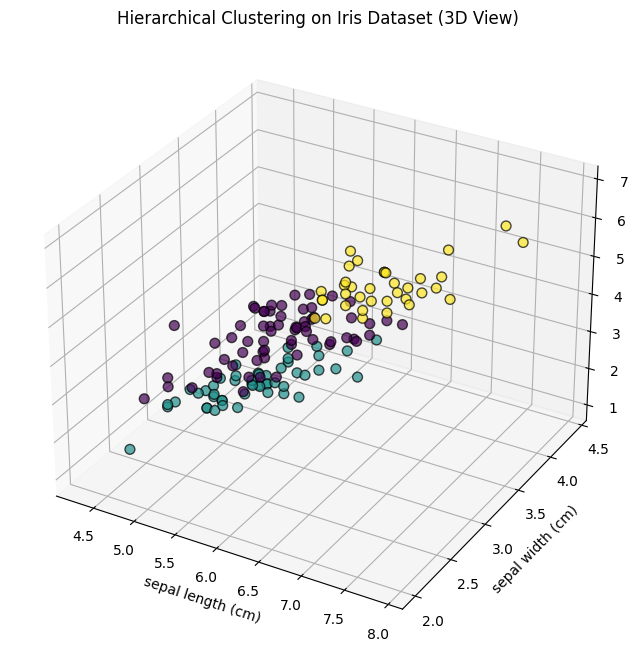

The 3D scatter plot provides a three-dimensional view of the clustering results, showing the distribution of data points and their cluster assignments from the Hierarchical Clustering algorithm.


In [5]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
from sklearn.cluster import AgglomerativeClustering  # Importing AgglomerativeClustering for hierarchical clustering
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
from scipy.cluster.hierarchy import dendrogram, linkage  # Importing tools for dendrogram

# Function to get user input
def get_user_input(prompt, dtype, default):
    """
    Function to get user input with error handling.
    Parameters:
        prompt (str): The prompt to display to the user.
        dtype (type): The expected data type of the input.
        default: The default value to use if input is invalid or not provided.
    Returns:
        value: The user input converted to the specified data type or the default value.
    """
    try:
        return dtype(input(prompt + f" (default: {default}): ") or default)  # Attempt to get and convert user input
    except ValueError:
        print(f"Invalid input, using default value: {default}")  # Handle invalid input
        return default  # Return default value in case of invalid input

# Main function for Hierarchical Clustering
def hierarchical_clustering():
    """
    Main function to perform Hierarchical clustering and visualize the results.
    """
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data  # Feature data
    y_true = iris.target  # True labels (for comparison)
    feature_names = iris.feature_names  # Feature names

    # User input for number of clusters
    n_clusters = get_user_input("Enter number of clusters for Hierarchical Clustering", int, 3)  # Get number of clusters from user

    # Apply Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)  # Initialize Hierarchical Clustering with user-defined clusters
    y_hierarchical = hierarchical.fit_predict(X)  # Fit Hierarchical Clustering and predict cluster labels

    # Scatter plot of the data points with their cluster assignments
    print("\n### Scatter Plot of Data Points with Cluster Assignments (Hierarchical Clustering) ###\n")
    plt.figure(figsize=(12, 8))  # Create a new figure for plotting
    plt.scatter(X[:, 0], X[:, 1], c=y_hierarchical, s=50, cmap='viridis', marker='o', edgecolor='k', alpha=0.7, label='Clustered Data')  # Plot data points with cluster colors

    plt.title("Hierarchical Clustering on Iris Dataset")  # Set the title of the plot
    plt.xlabel(feature_names[0])  # Set the label for the x-axis
    plt.ylabel(feature_names[1])  # Set the label for the y-axis
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid on the plot

    plt.show()  # Display the plot

    print("In the scatter plot above, each data point is colored according to the cluster it has been assigned to by the Hierarchical Clustering algorithm.")

    # Dendrogram
    print("\n### Dendrogram ###\n")
    plt.figure(figsize=(12, 8))  # Create a new figure for plotting the dendrogram
    Z = linkage(X, 'ward')  # Perform hierarchical/agglomerative clustering
    dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title("Hierarchical Clustering Dendrogram (Truncated)")  # Set the title of the plot
    plt.xlabel("Sample index")  # Set the label for the x-axis
    plt.ylabel("Distance")  # Set the label for the y-axis
    plt.show()  # Display the plot

    print("The dendrogram shows the hierarchical relationships between the data points. The vertical lines represent merging of clusters, and the height of each line represents the distance or dissimilarity between clusters.")

    # Pair plot with cluster assignments
    print("\n### Pair Plot of Iris Dataset with Cluster Assignments (Hierarchical Clustering) ###\n")
    df = sns.load_dataset('iris')  # Load Iris dataset as a DataFrame
    df['cluster'] = y_hierarchical  # Add cluster assignments to DataFrame
    sns.pairplot(df, hue='cluster', palette='viridis')  # Create pair plot with clusters
    plt.suptitle("Pair Plot of Iris Dataset with Hierarchical Clustering", y=1.02)  # Set title
    plt.show()  # Display the pair plot

    print("The pair plot shows pairwise relationships between features in the Iris dataset, with points colored by their cluster assignments from the Hierarchical Clustering algorithm.")

    # Heatmap of cluster centers
    print("\n### Heatmap of Cluster Centers ###\n")
    # Compute the cluster centers
    cluster_centers = np.array([X[y_hierarchical == i].mean(axis=0) for i in range(n_clusters)])
    plt.figure(figsize=(10, 6))  # Create a new figure for the heatmap
    sns.heatmap(cluster_centers, annot=True, cmap='coolwarm', cbar=True, xticklabels=feature_names, yticklabels=[f'Cluster {i+1}' for i in range(n_clusters)])  # Plot heatmap of cluster centers
    plt.title("Cluster Centers Heatmap")  # Set the title of the heatmap
    plt.xlabel("Features")  # Set the label for the x-axis
    plt.ylabel("Clusters")  # Set the label for the y-axis
    plt.show()  # Display the heatmap

    print("The heatmap displays the values of each feature for the cluster centers. Each row represents a cluster center, and each column represents a feature.")

    # 3D Scatter plot with cluster assignments
    print("\n### 3D Scatter Plot of Data Points with Cluster Assignments (Hierarchical Clustering) ###\n")
    from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting toolkit
    fig = plt.figure(figsize=(12, 8))  # Create a new figure for 3D plotting
    ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_hierarchical, s=50, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)  # Plot data points in 3D space
    ax.set_title("Hierarchical Clustering on Iris Dataset (3D View)")  # Set the title of the plot
    ax.set_xlabel(feature_names[0])  # Set the label for the x-axis
    ax.set_ylabel(feature_names[1])  # Set the label for the y-axis
    ax.set_zlabel(feature_names[2])  # Set the label for the z-axis
    plt.show()  # Display the 3D plot

    print("The 3D scatter plot provides a three-dimensional view of the clustering results, showing the distribution of data points and their cluster assignments from the Hierarchical Clustering algorithm.")

# Run the Hierarchical clustering function
hierarchical_clustering()  # Execute the main function


### Principal Component Analysis (PCA): Theory and Concept

**What is Principal Component Analysis (PCA)?**

Principal Component Analysis (PCA) is a popular technique used for dimensionality reduction in data analysis. It transforms the data into a new coordinate system, where the greatest variances by any projection of the data come to lie on the first coordinates (called principal components), the second greatest variances on the second coordinates, and so on.

**Why use PCA?**

- **Dimensionality Reduction**: Reduces the number of features in the dataset while preserving as much variance as possible.
- **Data Visualization**: Helps in visualizing high-dimensional data in 2D or 3D space.
- **Noise Reduction**: Reduces the impact of noise in the data by focusing on the main components.
- **Improved Performance**: Helps in improving the performance of machine learning models by reducing overfitting and computational cost.

**How does PCA work?**

1. **Standardize the Data**:
   - Ensure that each feature in the dataset contributes equally to the analysis by scaling the features to have mean 0 and variance 1.

2. **Compute the Covariance Matrix**:
   - Calculate the covariance matrix to understand how the variables in the dataset vary with respect to each other.

3. **Compute the Eigenvalues and Eigenvectors**:
   - Determine the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors determine the direction of the new feature space, and eigenvalues determine their magnitude.

4. **Sort the Eigenvalues and Eigenvectors**:
   - Sort the eigenvalues in descending order and select the top k eigenvalues and their corresponding eigenvectors. These form the principal components.

5. **Transform the Data**:
   - Project the original data onto the new feature space using the selected principal components to form a reduced-dimensional dataset.

**Key Concepts**:

- **Principal Components**: The directions in the feature space along which the data varies the most. Each principal component is a linear combination of the original features.
- **Explained Variance**: The amount of variance captured by each principal component. The first principal component captures the most variance, followed by the second, and so on.
- **Covariance Matrix**: A matrix that represents the pairwise covariances between the features in the dataset.

**Advantages**:
- Reduces the complexity of the dataset.
- Improves the performance of machine learning algorithms.
- Helps in visualizing high-dimensional data.

**Limitations**:
- PCA is a linear method and may not perform well on datasets with nonlinear relationships.
- The principal components may be difficult to interpret.
- PCA is sensitive to the scaling of the features.

---


<img src="https://miro.medium.com/v2/resize:fit:1400/1*37a_i1t1tDxDYT3ZI6Yn8w.gif" alt="Alt Text">


Enter number of principal components for PCA (default: 2): 2

### Scatter Plot of Data Points in PCA Space ###



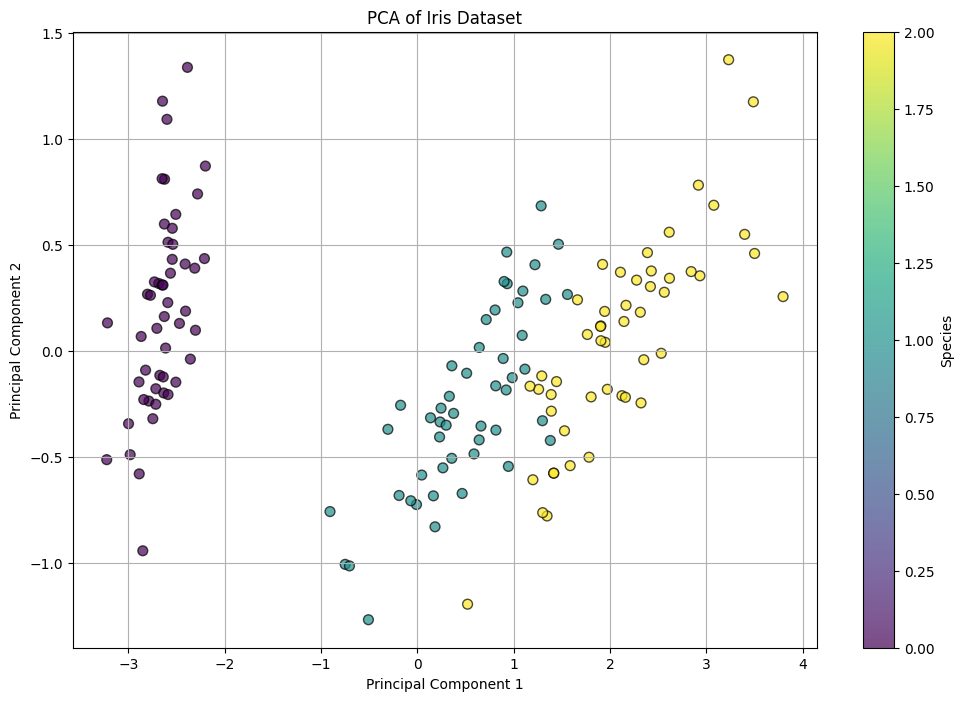

In the scatter plot above, each data point is represented in the space of the first two principal components. The colors indicate the true species of the Iris samples.

### Explained Variance Plot ###



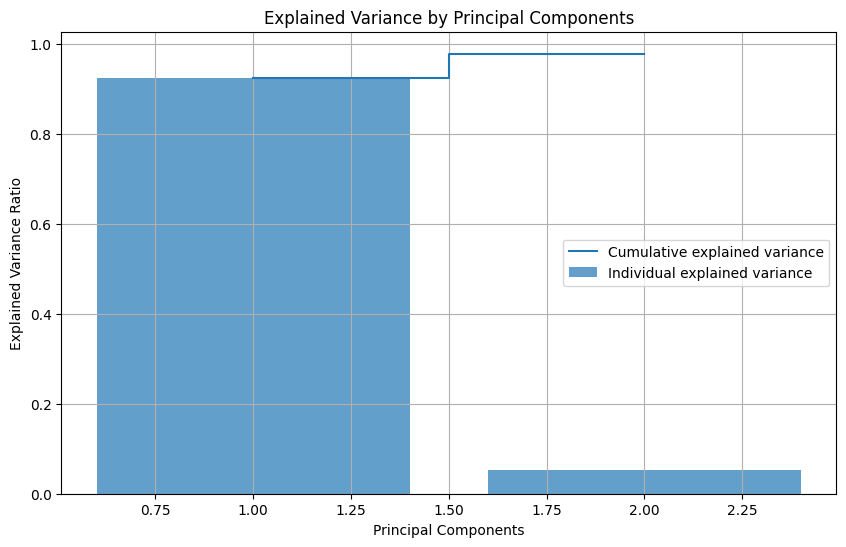

The explained variance plot shows the amount of variance captured by each principal component. The cumulative explained variance line indicates the total variance captured as we include more principal components.

### Pair Plot of PCA Components ###



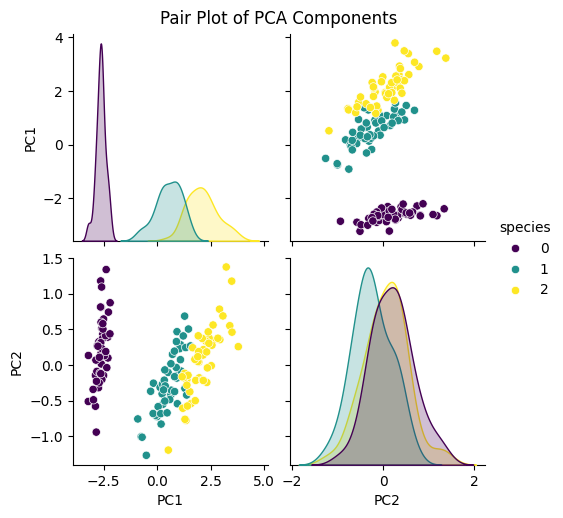

The pair plot shows pairwise relationships between the PCA components, with points colored by their species labels.


In [7]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
from sklearn.decomposition import PCA  # Importing PCA from sklearn for dimensionality reduction
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
import pandas as pd  # Importing pandas for DataFrame operations

# Function to get user input
def get_user_input(prompt, dtype, default):
    """
    Function to get user input with error handling.
    Parameters:
        prompt (str): The prompt to display to the user.
        dtype (type): The expected data type of the input.
        default: The default value to use if input is invalid or not provided.
    Returns:
        value: The user input converted to the specified data type or the default value.
    """
    try:
        return dtype(input(prompt + f" (default: {default}): ") or default)  # Attempt to get and convert user input
    except ValueError:
        print(f"Invalid input, using default value: {default}")  # Handle invalid input
        return default  # Return default value in case of invalid input

# Main function for PCA
def pca_analysis():
    """
    Main function to perform PCA and visualize the results.
    """
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data  # Feature data
    y = iris.target  # True labels
    feature_names = iris.feature_names  # Feature names

    # User input for number of principal components
    n_components = get_user_input("Enter number of principal components for PCA", int, 2)  # Get number of principal components from user

    # Apply PCA
    pca = PCA(n_components=n_components)  # Initialize PCA with user-defined components
    X_pca = pca.fit_transform(X)  # Fit PCA and transform the data

    # Explained variance
    explained_variance = pca.explained_variance_ratio_

    # Scatter plot of the data points in the PCA space
    print("\n### Scatter Plot of Data Points in PCA Space ###\n")
    plt.figure(figsize=(12, 8))  # Create a new figure for plotting
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)  # Plot data points in PCA space

    plt.title("PCA of Iris Dataset")  # Set the title of the plot
    plt.xlabel("Principal Component 1")  # Set the label for the x-axis
    plt.ylabel("Principal Component 2")  # Set the label for the y-axis
    plt.colorbar(scatter, label='Species')  # Show color bar with species labels
    plt.grid(True)  # Enable grid on the plot

    plt.show()  # Display the plot

    print("In the scatter plot above, each data point is represented in the space of the first two principal components. The colors indicate the true species of the Iris samples.")

    # Explained variance plot
    print("\n### Explained Variance Plot ###\n")
    plt.figure(figsize=(10, 6))  # Create a new figure for the explained variance plot
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
    plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
    plt.title('Explained Variance by Principal Components')  # Set the title of the plot
    plt.xlabel('Principal Components')  # Set the label for the x-axis
    plt.ylabel('Explained Variance Ratio')  # Set the label for the y-axis
    plt.legend(loc='best')  # Show legend
    plt.grid(True)  # Enable grid on the plot

    plt.show()  # Display the plot

    print("The explained variance plot shows the amount of variance captured by each principal component. The cumulative explained variance line indicates the total variance captured as we include more principal components.")

    # Pair plot of PCA components
    print("\n### Pair Plot of PCA Components ###\n")
    pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])  # Create a DataFrame with PCA components
    pca_df['species'] = y  # Add species labels to the DataFrame
    sns.pairplot(pca_df, hue='species', palette='viridis')  # Create pair plot with PCA components
    plt.suptitle("Pair Plot of PCA Components", y=1.02)  # Set title
    plt.show()  # Display the pair plot

    print("The pair plot shows pairwise relationships between the PCA components, with points colored by their species labels.")

# Run the PCA function
pca_analysis()  # Execute the main function


### t-Distributed Stochastic Neighbor Embedding (t-SNE): Theory and Concept

**What is t-SNE?**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique primarily used for data visualization. It is particularly effective at creating a 2D or 3D map of high-dimensional data, making it easier to visualize complex patterns and relationships.

**Why use t-SNE?**

- **Visualization**: t-SNE is particularly good at visualizing high-dimensional data in a low-dimensional space (2D or 3D), making it easier to detect patterns, clusters, and anomalies.
- **Nonlinear Relationships**: Unlike PCA, t-SNE can capture complex nonlinear relationships in the data.
- **Cluster Identification**: Helps in identifying clusters and understanding the structure of the data.

**How does t-SNE work?**

1. **Pairwise Similarities in High-Dimensional Space**:
   - t-SNE first calculates the probability that pairs of points in the high-dimensional space are similar. This probability is modeled using a Gaussian distribution.

2. **Pairwise Similarities in Low-Dimensional Space**:
   - It then calculates the probabilities in the low-dimensional space (typically 2D or 3D) using a Student's t-distribution, which has heavier tails than a Gaussian distribution. This allows t-SNE to handle data points that are far apart more effectively.

3. **Minimize the Kullback-Leibler Divergence**:
   - t-SNE minimizes the difference (Kullback-Leibler divergence) between the two distributions of pairwise similarities (high-dimensional and low-dimensional). The goal is to ensure that points that are close in the high-dimensional space remain close in the low-dimensional space.

**Key Concepts**:

- **Perplexity**: A parameter that controls the balance between local and global aspects of the data. It can be thought of as a smooth measure of the effective number of neighbors.
- **Kullback-Leibler Divergence**: A measure of how one probability distribution diverges from a second, expected probability distribution. t-SNE aims to minimize this divergence between the high-dimensional and low-dimensional representations.
- **Nonlinear Dimensionality Reduction**: Unlike linear methods (e.g., PCA), t-SNE can capture complex, nonlinear relationships in the data, making it suitable for visualizing intricate structures.

**Advantages**:
- Captures complex, nonlinear relationships in the data.
- Effective for visualizing high-dimensional data in 2D or 3D.
- Helps in identifying clusters and revealing hidden structures.

**Limitations**:
- Computationally intensive, especially for large datasets.
- Sensitive to hyperparameters like perplexity and learning rate.
- The resulting visualizations can be different for different runs due to randomness in the optimization process.

---


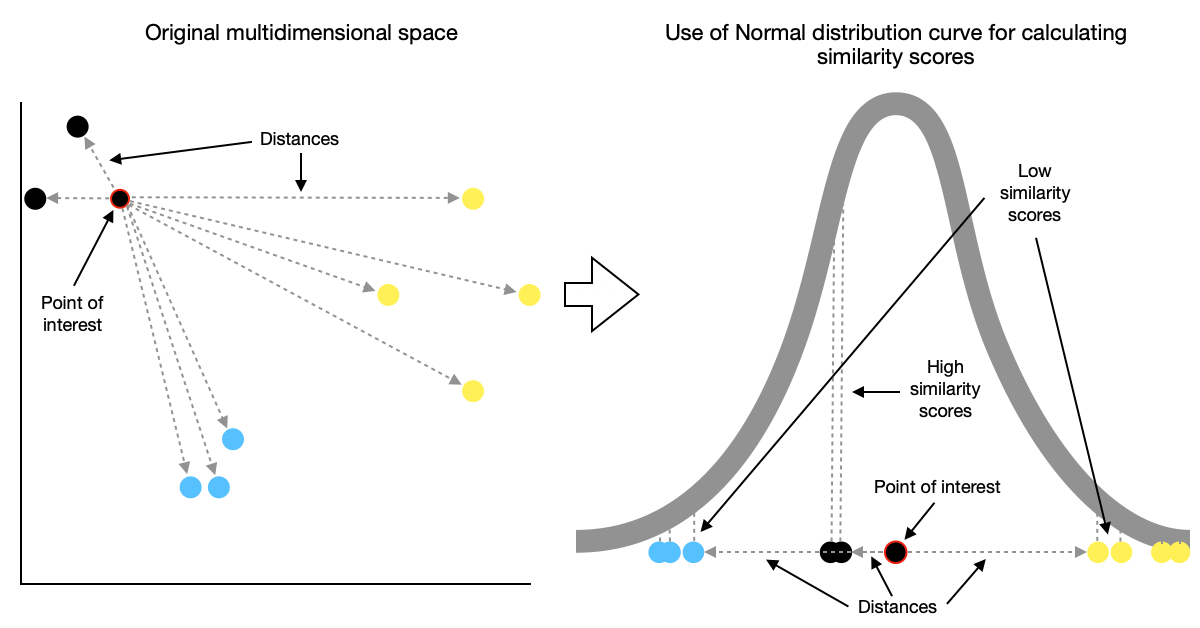



---



Enter number of components for t-SNE (default: 2): 2

### Scatter Plot of Data Points in t-SNE Space ###



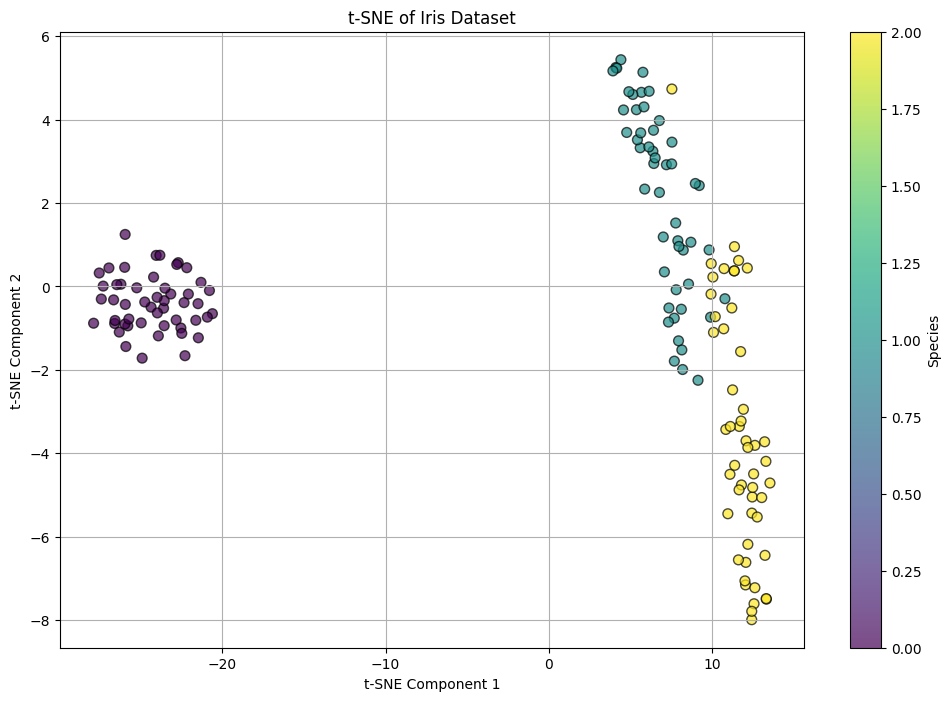

In the scatter plot above, each data point is represented in the space of the first two t-SNE components. The colors indicate the true species of the Iris samples.

### Pair Plot of t-SNE Components ###



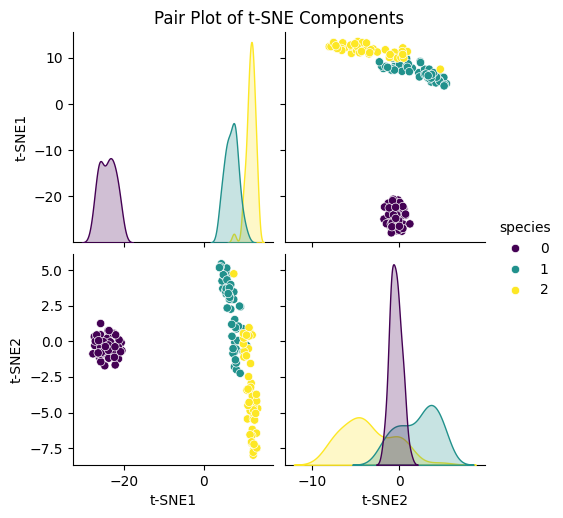

The pair plot shows pairwise relationships between the t-SNE components, with points colored by their species labels.


In [8]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
from sklearn.manifold import TSNE  # Importing t-SNE from sklearn for dimensionality reduction
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
import pandas as pd  # Importing pandas for DataFrame operations

# Function to get user input
def get_user_input(prompt, dtype, default):
    """
    Function to get user input with error handling.
    Parameters:
        prompt (str): The prompt to display to the user.
        dtype (type): The expected data type of the input.
        default: The default value to use if input is invalid or not provided.
    Returns:
        value: The user input converted to the specified data type or the default value.
    """
    try:
        return dtype(input(prompt + f" (default: {default}): ") or default)  # Attempt to get and convert user input
    except ValueError:
        print(f"Invalid input, using default value: {default}")  # Handle invalid input
        return default  # Return default value in case of invalid input

# Main function for t-SNE
def tsne_analysis():
    """
    Main function to perform t-SNE and visualize the results.
    """
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data  # Feature data
    y = iris.target  # True labels
    feature_names = iris.feature_names  # Feature names

    # User input for number of components
    n_components = get_user_input("Enter number of components for t-SNE", int, 2)  # Get number of components from user

    # Apply t-SNE
    tsne = TSNE(n_components=n_components, random_state=42)  # Initialize t-SNE with user-defined components
    X_tsne = tsne.fit_transform(X)  # Fit t-SNE and transform the data

    # Scatter plot of the data points in the t-SNE space
    print("\n### Scatter Plot of Data Points in t-SNE Space ###\n")
    plt.figure(figsize=(12, 8))  # Create a new figure for plotting
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=50, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)  # Plot data points in t-SNE space

    plt.title("t-SNE of Iris Dataset")  # Set the title of the plot
    plt.xlabel("t-SNE Component 1")  # Set the label for the x-axis
    plt.ylabel("t-SNE Component 2")  # Set the label for the y-axis
    plt.colorbar(scatter, label='Species')  # Show color bar with species labels
    plt.grid(True)  # Enable grid on the plot

    plt.show()  # Display the plot

    print("In the scatter plot above, each data point is represented in the space of the first two t-SNE components. The colors indicate the true species of the Iris samples.")

    # Pair plot of t-SNE components
    print("\n### Pair Plot of t-SNE Components ###\n")
    tsne_df = pd.DataFrame(X_tsne, columns=[f't-SNE{i+1}' for i in range(n_components)])  # Create a DataFrame with t-SNE components
    tsne_df['species'] = y  # Add species labels to the DataFrame
    sns.pairplot(tsne_df, hue='species', palette='viridis')  # Create pair plot with t-SNE components
    plt.suptitle("Pair Plot of t-SNE Components", y=1.02)  # Set title
    plt.show()  # Display the pair plot

    print("The pair plot shows pairwise relationships between the t-SNE components, with points colored by their species labels.")

# Run the t-SNE function
tsne_analysis()  # Execute the main function
